**Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones**

**Exploración y Curación de Datos**

*Edición 2021*

----

# Trabajo práctico entregable - parte 2


En el ejercicio **1** de la *parte 1* del entregable seleccionaron las filas y columnas relevantes al problema de predicción de precios de una propiedad. Además de ello, tuvieron que reducir el número de valores posibles para las variables categóricas utilizando información de dominio.

En el ejercicio **2** de la *parte 1* del entregable imputaron los valores faltantes de la columna `CouncilArea` y las columnas obtenidas a partir del conjunto de datos de **AirBnB**.

En esta notebook, **se utilizarán los resultados de dichas operaciones**.

In [1]:
import matplotlib.pyplot as plt
import numpy
import pandas
import seaborn

seaborn.set_context('talk')

In [2]:
melb_df = pandas.read_csv('https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/melb_data.csv')

melb_df.head(3)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0


In [3]:
df = pandas.read_csv('DataSet/curated_dataset.csv')

df.head(3)

,Suburb,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bathroom,...,Lattitude,Longtitude,Regionname,Propertycount,zipcode,bnb_price_mean,bnb_latitude_mean,bnb_longitude_mean,bnb_city_mode,bnb_suburb_mode
0,Abbotsford,2,h,1480000.0,S,Biggin,2016Q1,2.5,3067.0,1.0,...,-37.7996,144.9984,Northern Metropolitan,4019.0,3067.0,120.082677,-37.806091,145.000977,Yarra,Abbotsford
1,Abbotsford,2,h,1035000.0,S,Biggin,2016Q2,2.5,3067.0,1.0,...,-37.8079,144.9934,Northern Metropolitan,4019.0,3067.0,120.082677,-37.806091,145.000977,Yarra,Abbotsford
2,Abbotsford,3,h,1465000.0,SP,Biggin,2017Q2,2.5,3067.0,2.0,...,-37.8093,144.9944,Northern Metropolitan,4019.0,3067.0,120.082677,-37.806091,145.000977,Yarra,Abbotsford


## Ejercicio 1: Encoding

1. Seleccionar todas las filas y columnas del conjunto de datos obtenido en la *parte 1* del entregable, **excepto** `BuildingArea` y `YearBuilt`, que volveremos a imputar más adelante.

2. Aplicar una codificación *One-hot encoding* a cada fila, tanto para variables numéricas como categóricas. Si lo consideran necesario, pueden volver a reducir el número de categorías únicas.

Algunas opciones:
  1. Utilizar `OneHotEncoder` junto con el parámetro `categories` para las variables categóricas, y luego usar `numpy.hstack` para concatenar el resultado con las variables numéricas. 
  2. `DictVectorizer` con algunos pasos de pre-proceso previo.

Recordar también que el atributo `pandas.DataFrame.values` permite acceder a la matriz de *numpy* subyacente a un *DataFrame*.

In [4]:
df.shape

(13580, 23)

In [5]:
feature_dict = list(df.T.to_dict().values())

feature_dict[0]

{'Suburb': 'Abbotsford',
 'Rooms': 2,
 'Type': 'h',
 'Price': 1480000.0,
 'Method': 'S',
 'SellerG': 'Biggin',
 'Date': '2016Q1',
 'Distance': 2.5,
 'Postcode': 3067.0,
 'Bathroom': 1.0,
 'Car': 1.0,
 'Landsize': 202.0,
 'CouncilArea': 'Yarra',
 'Lattitude': -37.7996,
 'Longtitude': 144.9984,
 'Regionname': 'Northern Metropolitan',
 'Propertycount': 4019.0,
 'zipcode': 3067.0,
 'bnb_price_mean': 120.08267716535433,
 'bnb_latitude_mean': -37.80609081153544,
 'bnb_longitude_mean': 145.00097749448815,
 'bnb_city_mode': 'Yarra',
 'bnb_suburb_mode': 'Abbotsford'}

In [6]:
from sklearn.feature_extraction import DictVectorizer

vec = DictVectorizer()
feature_matrix = vec.fit_transform(feature_dict)

In [7]:
feature_matrix

<13580x795 sparse matrix of type '<class 'numpy.float64'>'
	with 312340 stored elements in Compressed Sparse Row format>

De las **795** columnas...

- **3** son por `Type`.
- **5** son por `Method`.
- **6** son por `Regionname`.
- **8** son por `Date`.
- **30** son por `bnb_city_mode`.
- **33** son por `CouncilArea`.
- **191** son por `SellerG`.
- **191** son por `bnb_suburb_mode`.
- **314** son por `Suburb`.

Y el resto (**14**) son por las variables numéricas `Rooms`, `Price`, `Distance`, `Postcode`, `Bathroom`, `Car`, `Landsize`, `Lattitude`, `Longitude`, `Propertycount`, `zipcode`, `bnb_price_mean`, `bnb_latitude_mean`, `bnb_longitude_mean`.

In [8]:
# Calculamos el tamaño estimado de la matriz densa.
size_MB = feature_matrix.shape[0] * feature_matrix.shape[1] * 4 / 1024 / 1024
print("La matriz DENSA ocupará aproximadamente {:.2f} MB".format(size_MB))

La matriz DENSA ocupará aproximadamente 41.18 MB


In [9]:
precision_type = numpy.float32

dense_feature_matrix = feature_matrix.astype(precision_type).todense()

print("Tamaño: {:.2f} MB".format(dense_feature_matrix.nbytes / 1024 / 1024))

Tamaño: 41.18 MB


In [10]:
encoded_df = pandas.DataFrame(data=dense_feature_matrix, columns=vec.get_feature_names())

encoded_df.head(3)

,Bathroom,Car,CouncilArea=Banyule,CouncilArea=Bayside,CouncilArea=Boroondara,CouncilArea=Brimbank,CouncilArea=Cardinia,CouncilArea=Casey,CouncilArea=Darebin,CouncilArea=Frankston,...,bnb_suburb_mode=West Melbourne,bnb_suburb_mode=Westmeadows,bnb_suburb_mode=Williams Landing,bnb_suburb_mode=Williamstown,bnb_suburb_mode=Wollert,bnb_suburb_mode=Wonga Park,bnb_suburb_mode=Wyndham Vale,bnb_suburb_mode=Yarra Glen,bnb_suburb_mode=Yarraville,zipcode
0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3067.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3067.0
2,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3067.0


In [11]:
encoded_df.shape

(13580, 795)

## Ejercicio 2: Imputación por KNN

En el teórico se presentó el método `IterativeImputer` para imputar valores faltantes en variables numéricas. Sin embargo, los ejemplos presentados sólo utilizaban algunas variables numéricas presentes en el conjunto de datos. En este ejercicio, utilizaremos la matriz de datos codificada para imputar datos faltantes de manera más precisa.

1. Agregue a la matriz obtenida en el punto anterior las columnas `YearBuilt` y `BuildingArea`.
2. Aplique una instancia de `IterativeImputer` con un estimador `KNeighborsRegressor` para imputar los valores de las variables. ¿Es necesario estandarizar o escalar los datos previamente?
3. Realice un gráfico mostrando la distribución de cada variable antes de ser imputada, y con ambos métodos de imputación.

In [12]:
relevant_cols = ['BuildingArea', 'YearBuilt']

In [13]:
join_df = encoded_df.join(melb_df[relevant_cols], how='left')

join_df.head(3)

,Bathroom,Car,CouncilArea=Banyule,CouncilArea=Bayside,CouncilArea=Boroondara,CouncilArea=Brimbank,CouncilArea=Cardinia,CouncilArea=Casey,CouncilArea=Darebin,CouncilArea=Frankston,...,bnb_suburb_mode=Williams Landing,bnb_suburb_mode=Williamstown,bnb_suburb_mode=Wollert,bnb_suburb_mode=Wonga Park,bnb_suburb_mode=Wyndham Vale,bnb_suburb_mode=Yarra Glen,bnb_suburb_mode=Yarraville,zipcode,BuildingArea,YearBuilt
0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3067.0,NaN,NaN
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3067.0,79.0,1900.0
2,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3067.0,150.0,1900.0


**Observaciones**

[Why is scaling required in KNN and K-Means?](https://medium.com/analytics-vidhya/why-is-scaling-required-in-knn-and-k-means-8129e4d88ed7)

**KNN** and **K-Means** are one of the most commonly and widely used machine learning algorithms.
**KNN** is a supervised learning algorithm and can be used to solve both classification as well as regression problems.
**K-Means**, on the other hand, is an unsupervised learning algorithm which is widely used to cluster data into different groups.
One thing which is common in both these algorithms is that both **KNN** and **K-Means** are distance based algorithms.
**KNN** chooses the *k* closest neighbors and then based on these neighbors, assigns a class (for classification problems) or predicts a value (for regression problems) for a new observation.
**K-Means** clusters the similar points together.
The similarity here is defined by the distance between the points.
Lesser the distance between the points, more is the similarity and vice versa.

[K-Nearest Neighbors](https://towardsdatascience.com/k-nearest-neighbors-94395f445221)

**KNN** can be very sensitive to the scale of data as it relies on computing the distances.
For features with a higher scale, the calculated distances can be very high and might produce poor results.
It is thus advised to scale the data before running the **KNN**.

In [14]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaled_matrix = scaler.fit_transform(join_df)

scaled_df = pandas.DataFrame(data=scaled_matrix, columns=join_df.columns)

In [15]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.impute import IterativeImputer

mice_imputer = IterativeImputer(random_state=0, estimator=KNeighborsRegressor())

In [16]:
# Solo las variables 'BuildingArea' y 'YearBuilt' del DF.
mice_df = scaled_df.copy(deep=True)

mice_df[relevant_cols] = mice_imputer.fit_transform(mice_df[relevant_cols])

/home/mgobbi289/miniconda3/envs/diplodatos-aycd/lib/python3.9/site-packages/sklearn/impute/_iterative.py:669: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn("[IterativeImputer] Early stopping criterion not"


In [ ]:
# Todas las variables del DF.
# TODO: Necesitamos aplicar KNN a TODO el DataSet.
full_mice_df = scaled_df.sample(500, random_state=123).copy(deep=True)

full_mice_df = mice_imputer.fit_transform(full_mice_df)

Ejemplo de gráfico comparando las distribuciones de datos obtenidas con cada método de imputación.

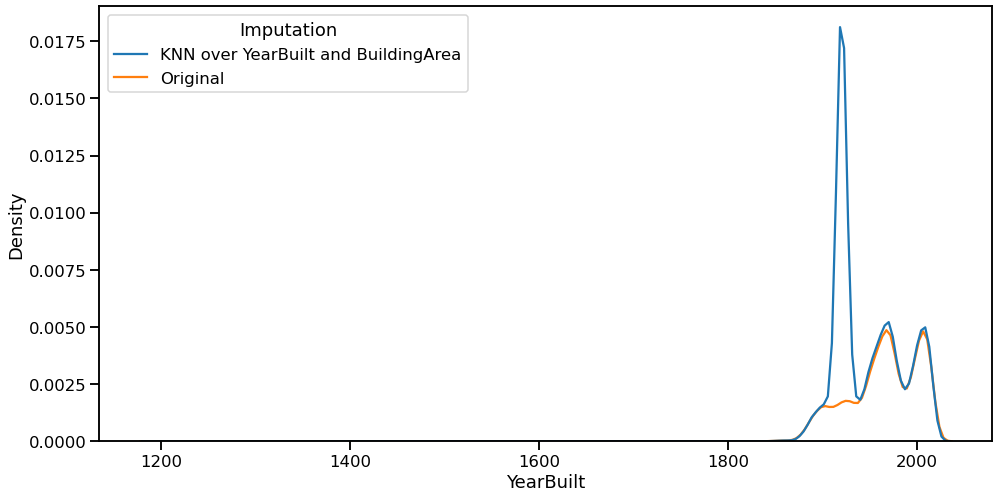

In [21]:
mice_year_built = mice_df.YearBuilt.to_frame()
mice_year_built['Imputation'] = 'KNN over YearBuilt and BuildingArea'

full_mice_year_built = full_mice_df.YearBuilt.to_frame()
full_mice_year_built['Imputation'] = 'KNN over all Variables'

melb_year_built = scaled_df.YearBuilt.dropna().to_frame()
melb_year_built['Imputation'] = 'Original'

data = pandas.concat([mice_year_built, full_mice_year_built, melb_year_built])

fig = plt.figure(figsize=(16, 8))
seaborn.kdeplot(data=data, x='YearBuilt', hue='Imputation');

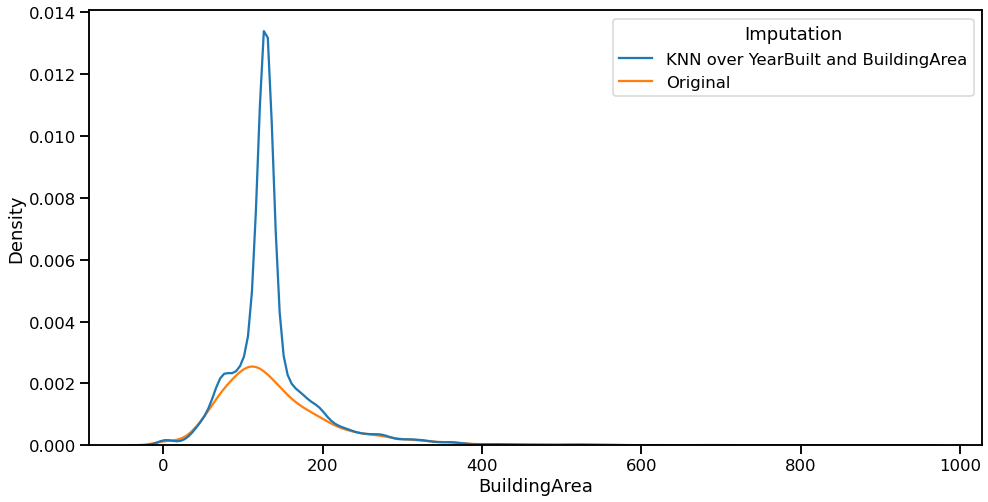

In [24]:
mice_building_area = mice_df.BuildingArea.to_frame()
mice_building_area['Imputation'] = 'KNN over YearBuilt and BuildingArea'

full_mice_building_area = full_mice_df.BuildingArea.to_frame()
full_mice_building_area['Imputation'] = 'KNN over all Variables'

melb_building_area = scaled_df.BuildingArea.dropna().to_frame()
melb_building_area['Imputation'] = 'Original'

data = pandas.concat([mice_building_area, full_mice_building_area, melb_building_area])

fig = plt.figure(figsize=(16, 8))
seaborn.kdeplot(data=data, x='BuildingArea', hue='Imputation');

## Ejercicio 3: Reducción de dimensionalidad.

Utilizando la matriz obtenida en el ejercicio anterior:
1. Aplique `PCA` para obtener $n$ componentes principales de la matriz, donde `n = min(20, X.shape[0])`. ¿Es necesario estandarizar o escalar los datos?
2. Grafique la varianza capturada por los primeros $n$ componentes principales, para cada $n$.
3. En base al gráfico, seleccione las primeras $m$ columnas de la matriz transformada para agregar como nuevas características al conjunto de datos.

## Ejercicio 4: Composición del resultado

Transformar nuevamente el conjunto de datos procesado en un `pandas.DataFrame` y guardarlo en un archivo.

Para eso, será necesario recordar el nombre original de cada columna de la matriz, en el orden correcto. Tener en cuenta:
1. El método `OneHotEncoder.get_feature_names` o el atributo `OneHotEncoder.categories_` permiten obtener una lista con los valores de la categoría que le corresponde a cada índice de la matriz.
2. Ninguno de los métodos aplicados intercambia de lugar las columnas o las filas de la matriz.

In [ ]:
## Small example
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder

## If we process our data with the following steps:
categorical_cols = ['Type', 'Regionname']
numerical_cols = ['Rooms', 'Distance']
new_columns = []

# Step 1: encode categorical columns
encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
X_cat = encoder.fit_transform(melb_df[categorical_cols])
for col, col_values in zip(categorical_cols, encoder.categories_):
  for col_value in col_values:
    new_columns.append('{}={}'.format(col, col_value))
print("Matrix has shape {}, with columns: {}".format(X_cat.shape, new_columns))

# Step 2: Append the numerical columns
X = numpy.hstack([X_cat, melb_df[numerical_cols].values])
new_columns.extend(numerical_cols)
print("Matrix has shape {}, with columns: {}".format(X_cat.shape, new_columns))

# Step 3: Append some new features, like PCA
pca = PCA(n_components=2)
pca_dummy_features = pca.fit_transform(X)
X_pca = numpy.hstack([X, pca_dummy_features])
new_columns.extend(['pca1', 'pca2'])

## Re-build dataframe
processed_melb_df = pandas.DataFrame(data=X_pca, columns=new_columns)
processed_melb_df.head()

Matrix has shape (13580, 11), with columns: ['Type=h', 'Type=t', 'Type=u', 'Regionname=Eastern Metropolitan', 'Regionname=Eastern Victoria', 'Regionname=Northern Metropolitan', 'Regionname=Northern Victoria', 'Regionname=South-Eastern Metropolitan', 'Regionname=Southern Metropolitan', 'Regionname=Western Metropolitan', 'Regionname=Western Victoria']
Matrix has shape (13580, 11), with columns: ['Type=h', 'Type=t', 'Type=u', 'Regionname=Eastern Metropolitan', 'Regionname=Eastern Victoria', 'Regionname=Northern Metropolitan', 'Regionname=Northern Victoria', 'Regionname=South-Eastern Metropolitan', 'Regionname=Southern Metropolitan', 'Regionname=Western Metropolitan', 'Regionname=Western Victoria', 'Rooms', 'Distance']


,Type=h,Type=t,Type=u,Regionname=Eastern Metropolitan,Regionname=Eastern Victoria,Regionname=Northern Metropolitan,Regionname=Northern Victoria,Regionname=South-Eastern Metropolitan,Regionname=Southern Metropolitan,Regionname=Western Metropolitan,Regionname=Western Victoria,Rooms,Distance,pca1,pca2
0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,2.5,-7.669418,-0.292703
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,2.5,-7.669418,-0.292703
2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,2.5,-7.620201,0.619633
3,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,2.5,-7.620201,0.619633
4,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,4.0,2.5,-7.570984,1.531969


## Ejercicio 5: Documentación

En un documento `.pdf` o `.md` realizar un reporte de las operaciones que realizaron para obtener el conjunto de datos final. Se debe incluir:
  1. Criterios de exclusión (o inclusión) de filas
  2. Interpretación de las columnas presentes
  2. Todas las transofrmaciones realizadas

Este documento es de uso técnico exclusivamente, y su objetivo es permitir que otres desarrolladores puedan reproducir los mismos pasos y obtener el mismo resultado. Debe ser detallado pero consiso. Por ejemplo:

```
  ## Criterios de exclusión de ejemplos
  1. Se eliminan ejemplos donde el año de construcción es previo a 1900

  ## Características seleccionadas
  ### Características categóricas
  1. Type: tipo de propiedad. 3 valores posibles
  2. ...
  Todas las características categóricas fueron codificadas con un
  método OneHotEncoding utilizando como máximo sus 30 valores más 
  frecuentes.
  
  ### Características numéricas
  1. Rooms: Cantidad de habitaciones
  2. Distance: Distancia al centro de la ciudad.
  3. airbnb_mean_price: Se agrega el precio promedio diario de 
     publicaciones de la plataforma AirBnB en el mismo código 
     postal. [Link al repositorio con datos externos].

  ### Transformaciones:
  1. Todas las características numéricas fueron estandarizadas.
  2. La columna `Suburb` fue imputada utilizando el método ...
  3. Las columnas `YearBuilt` y ... fueron imputadas utilizando el 
     algoritmo ...
  4. ...

  ### Datos aumentados
  1. Se agregan las 5 primeras columnas obtenidas a través del
     método de PCA, aplicado sobre el conjunto de datos
     totalmente procesado.
```
